# GD - Exercise 1

This exercise is intended to create a perceptron with a gradient descent approach to solve a binary classification problem with synthetic data generation

## Dataset

Each class will have exactly 600 data points and the seed should be set to 468.

Let's define the first class $X_1$:
- $X_1^1$ is a Possion distribution with $\lambda = 20$
- $X_1^2$ is a Possion distribution with $\lambda = 10$

The second class $X_2$ is defined as follows:
- $X_2^1$ is a Possion distribution with $\lambda = 25
- $X_2^2$ is a Possion distribution with $\lambda = 20$

The class $X_1$ will have the label "+1" meanwhile $X_2$ will have the label "-1"

In [216]:
import numpy as np

# set the seed
np.random.seed(468)

# number of samples per class
N = 600

# setup class 1
X1_1 = np.random.poisson(lam=20, size=N)
X1_2 = np.random.poisson(lam=25, size=N)

# setup class 2
X2_1 = np.random.poisson(lam=10, size=N)
X2_2 = np.random.poisson(lam=20, size=N)

# labels
Y1 = np.ones(N)
Y2 = - np.ones(N)

Plot the generated dataset using the <tt>scatter</tt> function

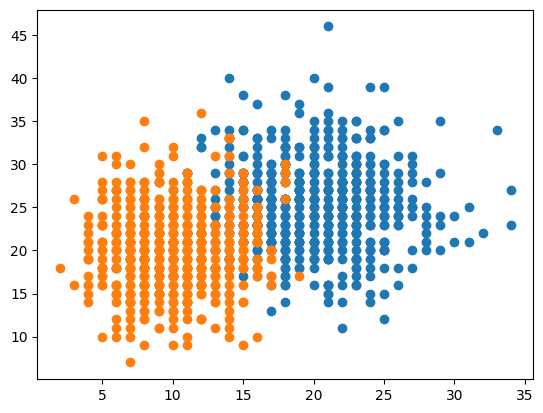

In [217]:
import matplotlib.pyplot as plt

# display class 1
plt.scatter(X1_1, X1_2)

# display class 1
plt.scatter(X2_1, X2_2)

Create the dataset $X$ by concatenating $X_1$ and $X_2$ and the bias $X_0$. Do the same to create the labels $Y$

In [218]:
# bias
X0 = np.ones(2 * N)

# feature X1
X1 = np.concatenate((X1_1, X2_1))

# feature X2
X2 = np.concatenate((X1_2, X2_2))

# dataset X
X = np.stack((X0, X1, X2), axis=1)

# label vector
y = np.concatenate((Y1, Y2))

### Error function

Define the error function as the_Sum Squared Error_ which is: $\frac{1}{2}\sum_{i = 1}^N(\text{e}_i)^2$, where $e$ is the error vector

In [219]:
def sse(X : np.matrix, y : np.array, w : np.array) -> float:
    return (np.sum( np.square( y - np.dot(X, w) ) ) ) / 2

## Learning

Set up the vector of weight $w$ as a uniform distribution from -0.5 to 0.5 then train the Perceptron model using the gradient descent approach, implementing the following requirements
- set parameter $\eta$ to $10^{-3}$
- set the maximum number of epochs to $100000$

In addition, note that we want to keep track of the errors per epoch. Store in a vector named <tt>errors_epoch</tt> the number of misclassified objects for each epoch and in another vector<tt>sse_epoch</tt>, the sum of squared errors per each epoch


In [220]:
# weight vector
w = np.random.uniform(low=-0.5, high=0.5, size=X.shape[1])

# learning rate
eta = 1e-3

# epochs
max_epoch = 100000
current_epoch = 0

# errors
sse_epoch = np.zeros(max_epoch)
errors_epoch = np.zeros(max_epoch)

# training
while current_epoch < max_epoch:

    # sum of squared errors
    sse_epoch[current_epoch] =  sse(X, y, w)
    
    # errors per epoch
    errors_epoch[current_epoch] = np.sum(y * np.sign(np.dot(X, w)) < 0)
    
    # learning rule
    w = w + 2 * eta * np.dot( np.transpose(X), y - np.dot(X, w) )/ X.shape[0]

    if errors_epoch[current_epoch] == 0:
        break

    current_epoch += 1

Display raw the plots containing the solution found.

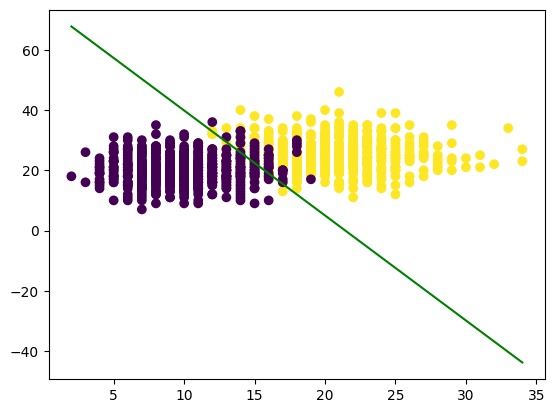

In [221]:
# datapoints
plt.scatter(X[:, 1], X[:, 2], c=y)

# plot GD result
plt.plot([ np.min((X1_1, X2_1)), np.max((X1_1, X2_1)) ],
         [ - np.min((X1_1, X2_1)) * (w[1] / w[2]) - (w[0] / w[2]), - np.max((X1_1, X2_1)) * (w[1] / w[2]) - (w[0] / w[2])],
         color="green")

Display the two error plots using the two error vectors

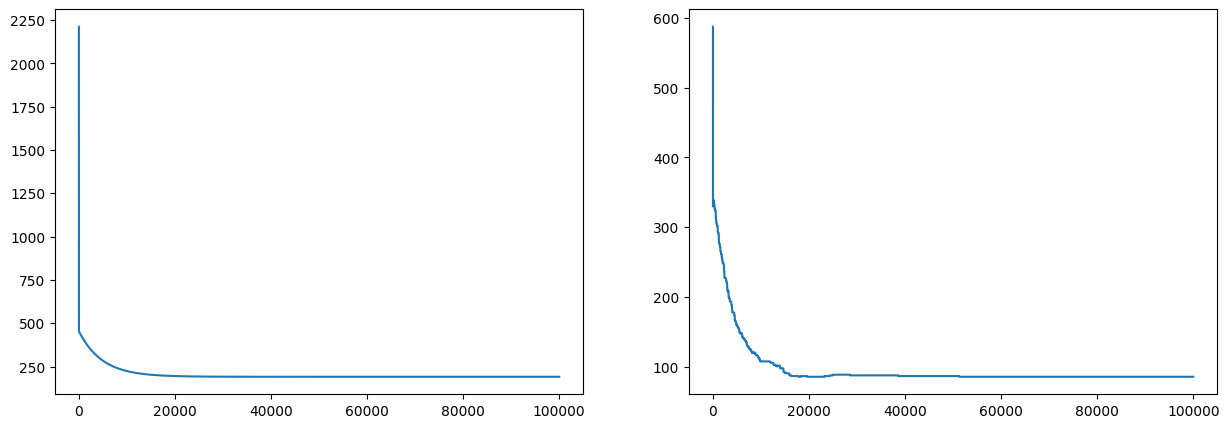

In [222]:
# subplot
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# sse
axs[0].plot(range(sse_epoch.size), sse_epoch)

# errors
axs[1].plot(range(errors_epoch.size), errors_epoch)